Time Series Analysis(TSA) is a method of analyzing data points collected over time to identify patterns,trends and seasonal variations.
It is used to forecast future values based on historical data.

# Time Series Analysis

Import Library

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

Loading and Viewing Data

In [11]:
df=pd.read_csv(r"C:\My python Files\DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


Setting Date as index

In [13]:
#checking for null values
print(df[df['date'].isna()])

Empty DataFrame
Columns: [date, meantemp, humidity, wind_speed, meanpressure]
Index: []


In [14]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [15]:
#setting Index
df.set_index("date",inplace=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


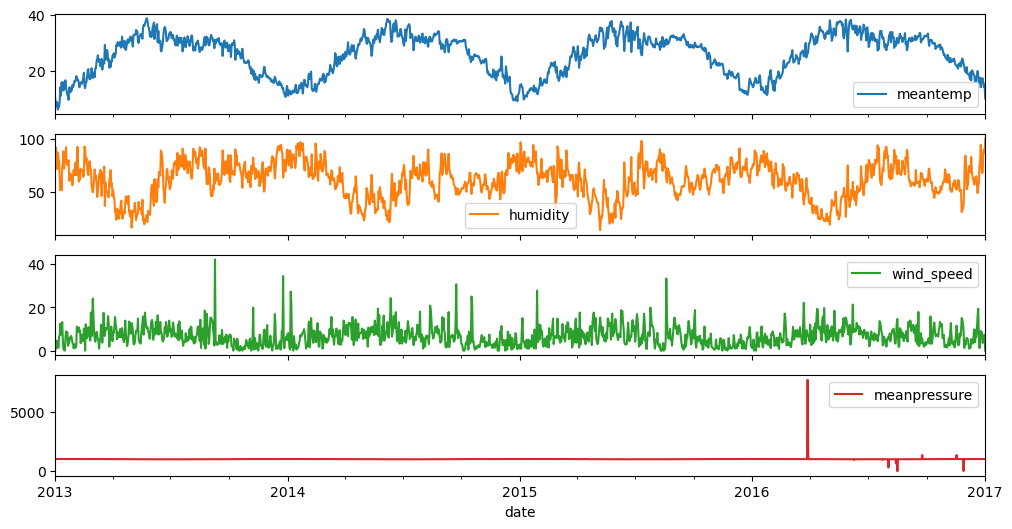

In [17]:
df.plot(figsize=(12,6),subplots=True)
plt.show()

1. Mean Temperature:
   - Temperature is following a trend.
   - That is there is increase in temperature at the start of the year,decrease in temperature at the end of the year
2. Humidity:
   - Humidity is High at the start of the year.
   - There is lot of fluctuation in the humidity
3. Wind Speed:
   - Here we can see spark in the end of 2013 year which may be cyclon or any environmental cause.
   - In 2014 starting 2 sparks,in 2015 also 2 sparks.
4. Mean pressure:
   - There is contant pressure upto 2016 year.
   - In 2016 year we can see a spark which may be a error value or not recorded properly.

# Stationarity:
A time series is stationary if its statistical properties(mean,variance,autocorrelation) remain constant over time.
1. Hypothesis of the ADF Test:
  - Null hypothesis(Ho) : The time series has a unit root(i,e.,it is non-stationary).
  - Alternative Hypothesis(H1) : The time series does not have a unit root(i,e.,it is stationary).
2. Interpreting ADF test Result:
  - If the p-value is less than 0.05,reject Ho->The series is stationary
  - If the p-value is greater than 0.05,fail to reject Ho-> The series is non-stationary

In [18]:
adfuller_result=adfuller(df['meantemp'])

In [19]:
print(adfuller_result)

(-2.0210690559206728, 0.27741213723016056, 10, 1451, {'1%': -3.4348647527922824, '5%': -2.863533960720434, '10%': -2.567831568508802}, 5423.895746470953)


In [20]:
if adfuller_result[1] < 0.05:
    print("Stationary")
else:
    print("Non-Stationary")

Non-Stationary


# Differncing to Remove Trend:If the series is non-stationary,apply differencing.
Differencing is a technique uesd to make a non-stationary time series stationary by removing trends or seasonality.I t involves subtracting the previous observation from the current observation.

- temperature=[20,21,22,24,25,27,28,27]
- Difference=[Nan,1,1,2,1,2,1,-1]
- The new series fluctuates around -2 to 2.

Differencing

In [22]:
df['meantemp_diff']=df['meantemp'].diff()
df.head()

,meantemp,humidity,wind_speed,meanpressure,meantemp_diff
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667


In [24]:
adfuller_result_afterdiff=adfuller(df['meantemp_diff'].dropna())
if(adfuller_result_afterdiff[1] > 0.05):
    print("Non Stationary")
else:
    print("Stationary")

Stationary


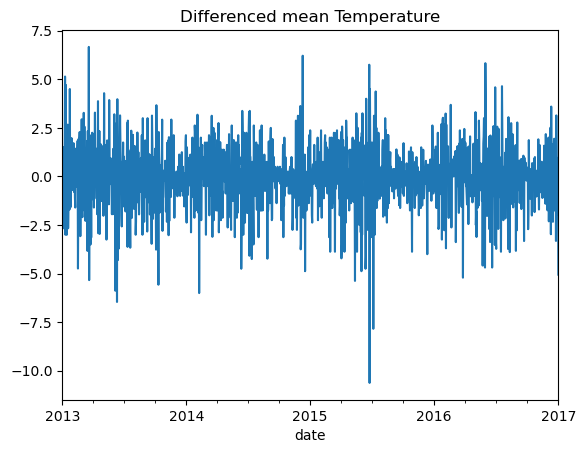

In [25]:
df['meantemp_diff'].plot(title="Differenced mean Temperature")
plt.show()

Conclusion:
1. The mean temperature is now stationary.
2. The average is around a zero.
3. After the differencing also there is some splike which means outlier is present.
4. In between 2015 and 2016 there is extreme low in temperature.
5. In 2015 starting there is extreme decrease in temperature.

# Use Seasonal Decomposition to analyze trend,seasonality, and residuals
Seasonal decomposition is a techique uesd to break a time series into three main components: 
- Trend-  The Long-term pattern (increase or decrease over time).
- Seasonality- The repeating pattern at fixed intervals(e.g.,higher sales in December).
- Residual component - The remaining part after removing trend and seasonality(random noise).

Interpreting th output:
 - Original Series- The raw time series data.
 - Trend Component- The general direction of the data over time.
 - Seasonal Component- The repeating pattern(e.g.,higher sales in december)
 - Residual Component- The remaining part after removing trend and seasonality(random noise)

Decomposing:

In [26]:
decomposing=seasonal_decompose(df['meantemp'],model='additive',period=365)

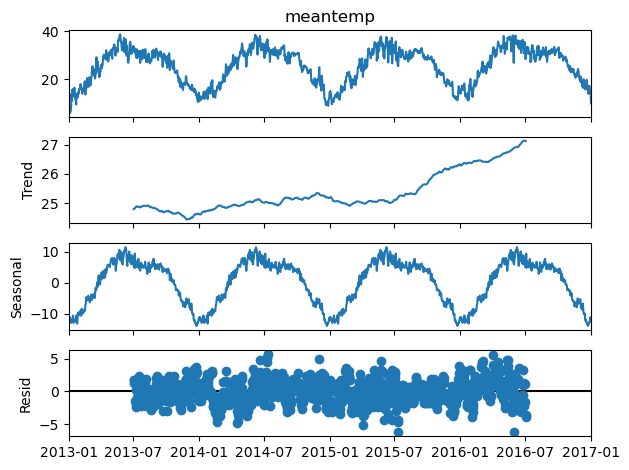

In [27]:
decomposing.plot()
plt.show()

Conclusion:
1. Trend:
 - Rapid increase in temperature from the year 2015
 - There is a gradual increase but in 2016-01 , 2016-07 there is rapid increase.
 - Over all increase is 2 degree.
2. Seasonal:
 - Annual seasonal temperature is constant.
 - There is a no difference in the seasonal temperature.
3. Residual:
  - The average temparature is Zero.

ARIMA

In [29]:
#splitting data
len(df)

1462

In [30]:
print(len(df)*0.8)

1169.6000000000001


In [31]:
train=df.iloc[0:1169]
test=df.iloc[1169:]

In [34]:
mymodel=ARIMA(train['meantemp'],order=(1,1,1))

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [35]:
mymodel=mymodel.fit()

In [37]:
forecast=mymodel.forecast(steps=len(test))
print(forecast)

2016-03-15    22.826205
2016-03-16    23.085687
2016-03-17    23.234913
2016-03-18    23.320731
2016-03-19    23.370084
                ...    
2016-12-28    23.436880
2016-12-29    23.436880
2016-12-30    23.436880
2016-12-31    23.436880
2017-01-01    23.436880
Freq: D, Name: predicted_mean, Length: 293, dtype: float64


In [41]:
test['forecast']=forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8368\2406814425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast']=forecast


,meantemp,humidity,wind_speed,meanpressure,meantemp_diff,forecast
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,22.826205
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,23.085687
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,23.234913
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,23.320731
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,23.370084


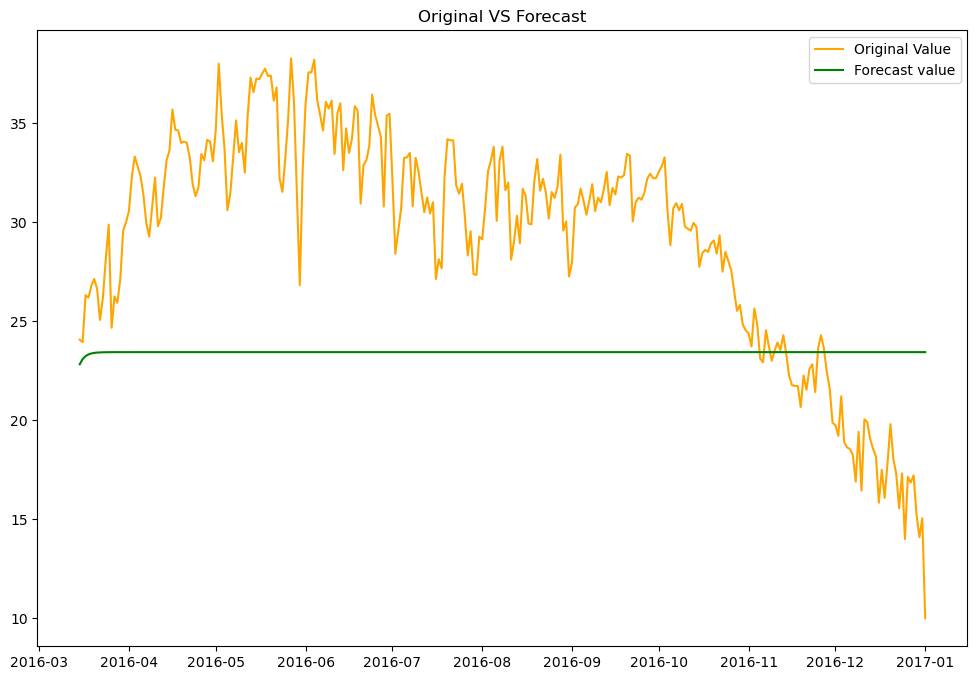

In [44]:
plt.figure(figsize=[12,8])
plt.plot(test.index,test['meantemp'],color='orange',label='Original Value')
plt.plot(test.index,test['forecast'],color='green',label='Forecast value')
plt.title("Original VS Forecast")
plt.legend()
plt.show()

In [45]:
len(df)

1462

In [46]:
print(len(df)*0.08)

116.96000000000001


In [47]:
train1=df.iloc[0:1169]
test1=df.iloc[1169:]

In [50]:
adfuller_result_afterdiff=adfuller(df['meantemp_diff'].dropna())

In [51]:
len(df)

1462

In [52]:
train1=df.iloc[0:1169]
test1=df.iloc[1169:]

In [67]:
mymodel1=ARIMA(train1['meantemp_diff'],order=(1,1,1))

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [68]:
mymodel1=mymodel1.fit()

In [70]:
forecast_diff=mymodel.forecast(steps=len(test))
print(forecast_diff)

2016-03-15    0.322914
2016-03-16   -0.040400
2016-03-17    0.019656
2016-03-18    0.009729
2016-03-19    0.011370
                ...   
2016-12-28    0.011137
2016-12-29    0.011137
2016-12-30    0.011137
2016-12-31    0.011137
2017-01-01    0.011137
Freq: D, Name: predicted_mean, Length: 293, dtype: float64


In [72]:
test1['forecast_diff']=forecast_diff
test1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8368\594841171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['forecast_diff']=forecast_diff


,meantemp,humidity,wind_speed,meanpressure,meantemp_diff,forecast_diff
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,0.322914
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,-0.040400
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,0.019656
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,0.009729
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,0.011370


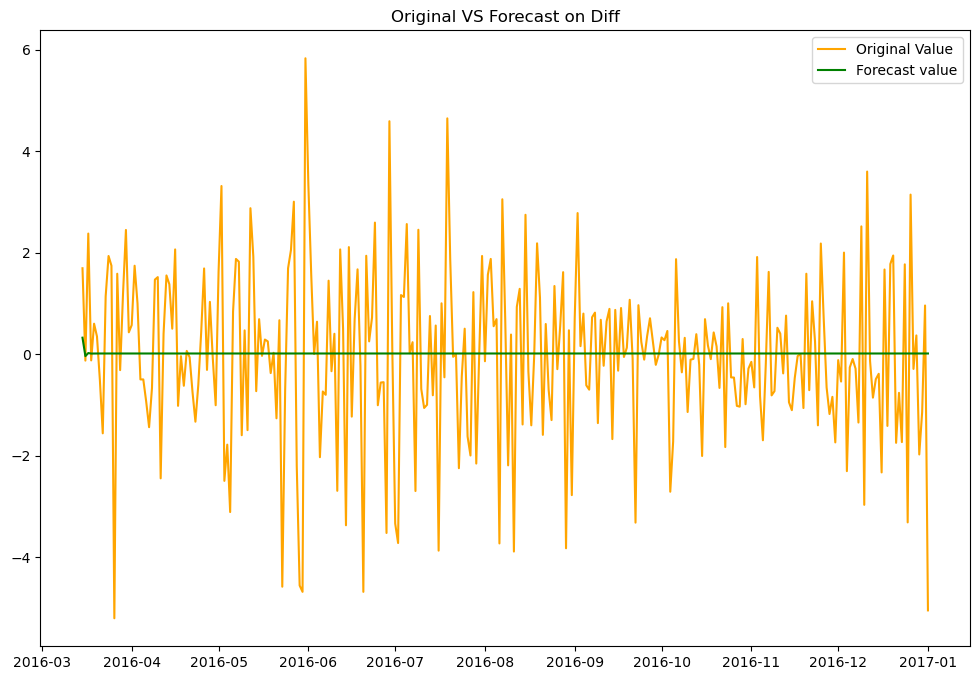

In [75]:
plt.figure(figsize=[12,8])
plt.plot(test1.index,test1['meantemp_diff'],color='orange',label='Original Value')
plt.plot(test1.index,test1['forecast_diff'],color='green',label='Forecast value')
plt.title("Original VS Forecast on Diff")
plt.legend()
plt.show()

15th March, Original value is 24.06666, model says there is -0.40438 change on next day.
24.066667 - 0.40438 = 24.02 (predicted) ~ 23.93700 (Original)